# Classification with Neural Networks

**Neural networks** are a powerful set of machine learning algorithms. Neural network use one or more **hidden layers** of multiple **hidden units** to perform **function approximation**. The use of multiple hidden units in one or more layers, allows neural networks to approximate complex functions. Neural network models capable of approximating complex functions are said to have high **model capacity**. This property allows neural networks to solve complex machine learning problems. 

However, because of the large number of hidden units, neural networks have many **weights** or **parameters**. This situation often leads to **over-fitting** of neural network models, which limits generalization. Thus, finding optimal hyperparameters when fitting neural network models is essential for good performance. 

An additional issue with neural networks is **computational complexity**. Many optimization iterations are required. Each optimization iteration requires the update of a large number of parameters.  

## Example: Iris dataset

As a first example you will use neutral network models to classify the species of iris flowers using the famous iris dataset. 

As a first step, execute the code in the cell below to load the required packages to run the rest of this notebook. 

> **Note:** If you are running in Azure Notebooks, make sure that you run the code in the `setup.ipynb` notebook at the start of you session to ensure your environment is correctly configured. 

In [4]:
## Import packages
library(ggplot2)
library(gridExtra)
library(repr)
library(dplyr)
library(caret)
library(nnet)
library(MLmetrics)

options(repr.plot.width=4, repr.plot.height=4) # Set the initial plot area dimensions


Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice

Attaching package: 'MLmetrics'

The following objects are masked from 'package:caret':

    MAE, RMSE

The following object is masked from 'package:base':

    Recall



To get a feel for these data, you will now load and plot them. Execute this code and examine the results. 

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


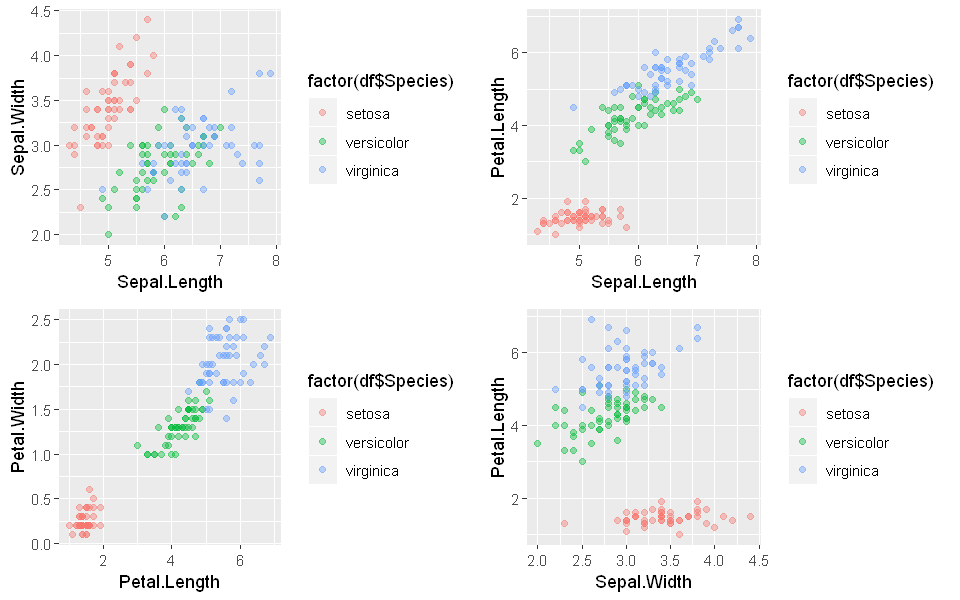

In [5]:
single_plot = function(df, colx, coly){
    ggplot(df, aes_string(colx,coly)) +
          geom_point(aes(color = factor(df$Species)), alpha = 0.4)
}

plot_iris = function(df){
    options(repr.plot.width=8, repr.plot.height=5)
    grid.arrange(
        single_plot(df, 'Sepal.Length', 'Sepal.Width'),
        single_plot(df, 'Sepal.Length', 'Petal.Length'),
        single_plot(df, 'Petal.Length', 'Petal.Width'),
        single_plot(df, 'Sepal.Width', 'Petal.Length'),
        nrow = 2)
}

head(iris, 10)   
plot_iris(iris) 

You can see that Setosa is well separated from the other two categories. The Versicolor and the Virginica show considerable overlap. The question is how well our classifier will separate these categories. 

Next, execute the code in the cell below to split the dataset into test and training set. Notice that unusually, 67% of the cases are being used as the test dataset. 

In [6]:
set.seed(1955)
## Randomly sample cases to create independent training and test data
partition = createDataPartition(iris[,'Species'], times = 1, p = 0.33, list = FALSE)
training = iris[partition,] # Create the training sample
dim(training)
test = iris[-partition,] # Create the test sample
dim(test)

[1] 51  5

[1] 99  5

As is always the case with machine learning, numeric features  must be scaled. Execute the code in the cell below to scale the training and test datasets:

In [7]:
num_cols = c('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width')
preProcValues <- preProcess(training[,num_cols], method = c("center", "scale"))

training[,num_cols] = predict(preProcValues, training[,num_cols])
test[,num_cols] = predict(preProcValues, test[,num_cols])
head(training[,num_cols])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.8850113,1.0640422,-1.344993,-1.284654
3,-1.3716483,0.3885299,-1.401918,-1.284654
5,-1.0066706,1.2892130,-1.344993,-1.284654
6,-0.5200336,1.9647253,-1.174218,-1.022585
9,-1.7366260,-0.2869823,-1.344993,-1.284654
10,-1.1283298,0.1633592,-1.288068,-1.415689


Now you will define and fit a neural network module using `nnet` function from the r nnet package.  The single hidden layer with 50 units is defined by setting the `size` to a list with single element of 50. Execute this code.

In [8]:
set.seed(6677)
nn_mod = nnet(Species ~ ., data = training, size = c(50))

# weights:  403
initial  value 40.904213 
iter  10 value 2.610630
iter  20 value 0.008345
final  value 0.000092 
converged


The model provides information on the convergence of the algorithm. 

The code below scores the model by the following steps:  
1. The probabilities for each of the classes are is computed for each case. 
2. The `which.max` function is applied to these probabilities to create a numeric score.
3. The numeric score is transformed to the class names. 

Execute this code and examine the results. 

In [9]:
probs = predict(nn_mod, newdata = test)
head(probs)
test$scores = apply(probs, 1, which.max)
test$scores = ifelse(test$scores == 1, 'setosa', ifelse(test$scores == 2, 'versicolor', 'virginica'))
head(test)

,setosa,versicolor,virginica
2,1,2.160947e-16,1.160358e-78
4,1,3.522321e-16,2.145861e-78
7,1,6.087068e-19,4.892052e-81
8,1,8.111373e-21,1.047931e-82
13,1,2.077941e-16,1.301302e-78
14,1,4.754266e-15,2.837922e-77


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,scores
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
2,-1.128330,-0.06181158,-1.344993,-1.284654,setosa,setosa
4,-1.493308,0.16335918,-1.288068,-1.284654,setosa,setosa
7,-1.493308,0.83887147,-1.344993,-1.153619,setosa,setosa
8,-1.006671,0.83887147,-1.288068,-1.284654,setosa,setosa
13,-1.249989,-0.06181158,-1.344993,-1.415689,setosa,setosa
14,-1.858285,-0.06181158,-1.515768,-1.415689,setosa,setosa


You can see the class probabilities computed from the model. Then the score by class can be seen.    

It is time to evaluate the model results. Keep in mind that the problem has been made deliberately difficult, by having more test cases than training cases. The iris data has three species categories. Therefore it is necessary to use evaluation code for a three category problem. The function in the cell below extends code from previous labs to deal with a three category problem. 

Execute this code, examine the results, and answer **Question 1** on the course page.

In [10]:
print_metrics = function(df, label){
    ## Compute and print the confusion matrix
    cm = as.matrix(table(Actual = df$Species, Predicted = df$scores))
    print(cm)

    ## Compute and print accuracy 
    accuracy = round(sum(sapply(1:nrow(cm), function(i) cm[i,i]))/sum(cm), 3)
    cat('\n')
    cat(paste('Accuracy = ', as.character(accuracy)), '\n \n')                           

    ## Compute and print precision, recall and F1
    precision = sapply(1:nrow(cm), function(i) cm[i,i]/sum(cm[i,]))
    recall = sapply(1:nrow(cm), function(i) cm[i,i]/sum(cm[,i]))    
    F1 = sapply(1:nrow(cm), function(i) 2*(recall[i] * precision[i])/(recall[i] + precision[i]))    
    metrics = sapply(c(precision, recall, F1), round, 3)        
    metrics = t(matrix(metrics, nrow = nrow(cm), ncol = ncol(cm)))       
    dimnames(metrics) = list(c('Precision', 'Recall', 'F1'), unique(test$Species))      
    print(metrics)
}  
print_metrics(test, 'Species')     

            Predicted
Actual       setosa versicolor virginica
  setosa         33          0         0
  versicolor      0         29         4
  virginica       0          5        28

Accuracy =  0.909 
 
          setosa versicolor virginica
Precision      1      0.879     0.848
Recall         1      0.853     0.875
F1             1      0.866     0.862


Examine these results. Notice the following:
1. The confusion matrix has dimension 3X3. You can see that most cases are correctly classified. 
2. The overall accuracy is 0.91. Since the classes are roughly balanced, this metric indicates relatively good performance of the classifier, particularly since it was only trained on 50 cases. 
3. The precision, recall and  F1 for each of the classes is relatively good. Virginica has the worst metrics since it has the largest number of misclassified cases. 

How important are each of the features for this model? The R Caret package provides the capability to find out. As a first step, `gbm` models must be trained using the the Caret `train` function. The code in the cell below does this, using the default model arguments. The default arguments for the model are specified with the `tuneGrid` argument of `train`. Execute the code.

In [11]:
set.seed(9876)
trControl <- trainControl(method = "cv", number = 10)

nn_mod_train = train(Species ~ ., 
                     data = training, 
                     method = "nnet", 
                     verbose = FALSE,
                     trControl = trControl,
                     tuneGrid = expand.grid(decay = 0, size = c(50)),
                     trace = FALSE)
nn_mod_train 

Neural Network 

51 samples
 4 predictor
 3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 46, 46, 46, 45, 46, 45, ... 
Resampling results:

  Accuracy   Kappa    
  0.9033333  0.8555147

Tuning parameter 'size' was held constant at a value of 50
Tuning
 parameter 'decay' was held constant at a value of 0

With the Caret model object trained, the feature importance can be computed and displayed. Execute this code and examine the results. 

In [12]:
options(repr.plot.width=4, repr.plot.height=3)
imp = varImp(nn_mod_train, scale = FALSE)$importance
imp

,Overall,setosa,versicolor,virginica
Sepal.Length,21.01563,21.01563,21.01563,21.01563
Sepal.Width,18.35799,18.35799,18.35799,18.35799
Petal.Length,39.72957,39.72957,39.72957,39.72957
Petal.Width,20.89681,20.89681,20.89681,20.89681


Examine the table above. Notice that `Sepal.Length` has the least importance for classifying each of the species. 

Execute this code, and answer **Question 2** on the course page.

Next, you will train and evaluate a model using the three most important features by executing the code in the cell below:

In [13]:
set.seed(5678)
nn_mod = nnet(Species ~ Sepal.Width + Petal.Length + Petal.Width, data = training, size = c(50))
probs = predict(nn_mod, newdata = test)
test$scores = apply(probs, 1, which.max)
test$scores = ifelse(test$scores == 1, 'setosa', ifelse(test$scores == 2, 'versicolor', 'virginica'))
print_metrics(test, 'Species')     

# weights:  353
initial  value 63.716595 
iter  10 value 3.535932
iter  20 value 2.117196
iter  30 value 0.590283
iter  40 value 0.000681
final  value 0.000058 
converged
            Predicted
Actual       setosa versicolor virginica
  setosa         33          0         0
  versicolor      0         31         2
  virginica       0          5        28

Accuracy =  0.929 
 
          setosa versicolor virginica
Precision      1      0.939     0.848
Recall         1      0.861     0.933
F1             1      0.899     0.889


These results are identical to those obtained with the model with all features. The simpler model is preferred since it is likely to generalize better. 

The code in the cell below plots the classes of the iris flower along with the classification errors shown by shape. Execute this code and examine the results.  

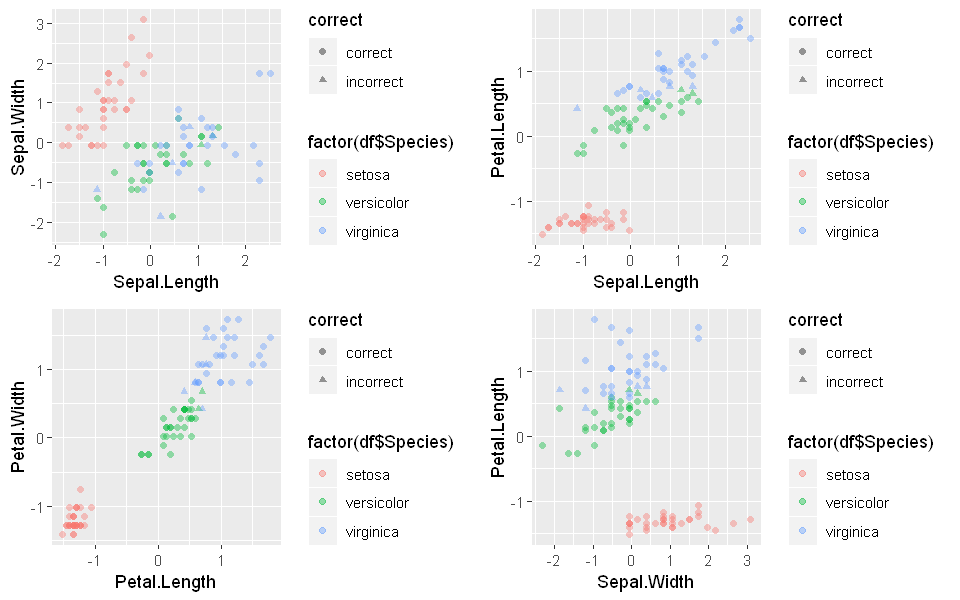

In [14]:
## Create column of correct-incorrect classification
test$correct = ifelse(test$Species == test$scores, 'correct', 'incorrect')

single_plot_classes = function(df, colx, coly){
    ggplot(df, aes_string(colx,coly)) +
          geom_point(aes(color = factor(df$Species), shape = correct), alpha = 0.4)
}

plot_iris_classes = function(df){
    options(repr.plot.width=8, repr.plot.height=5)
    grid.arrange(
        single_plot_classes(df, 'Sepal.Length', 'Sepal.Width'),
        single_plot_classes(df, 'Sepal.Length', 'Petal.Length'),
        single_plot_classes(df, 'Petal.Length', 'Petal.Width'),
        single_plot_classes(df, 'Sepal.Width', 'Petal.Length'),
        nrow = 2)
}

plot_iris_classes(test)

Examine these plots. You can see how the classifier has divided the feature space between the classes. Notice that most of the errors occur in the overlap region between Virginica and Versicolor. This behavior is to be expected.  

## Another example

Now, you will try a more complex example using the credit scoring data. You will use the prepared data which has been prepared by removing duplicate cases. Some columns which are know not to be predictive are removed. Execute the code in the cell below to load the dataset for the example. 

In [15]:
credit = read.csv('German_Credit_Preped.csv', header = TRUE)
## Subset the data frame
credit = credit[,c('checking_account_status', 'loan_duration_mo', 'credit_history', 'loan_amount', 'savings_account_balance',
                   'time_employed_yrs', 'payment_pcnt_income', 'time_in_residence', 'property', 'age_yrs',
                   'other_credit_outstanding', 'number_loans', 'job_category', 'dependents', 'telephone', 'bad_credit' )]
print(dim(credit))
names(credit)
head(credit)

[1] 1000   16


[1] "checking_account_status"  "loan_duration_mo"        
 [3] "credit_history"           "loan_amount"             
 [5] "savings_account_balance"  "time_employed_yrs"       
 [7] "payment_pcnt_income"      "time_in_residence"       
 [9] "property"                 "age_yrs"                 
[11] "other_credit_outstanding" "number_loans"            
[13] "job_category"             "dependents"              
[15] "telephone"                "bad_credit"

checking_account_status,loan_duration_mo,credit_history,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,time_in_residence,property,age_yrs,other_credit_outstanding,number_loans,job_category,dependents,telephone,bad_credit
<fct>,<int>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>
< 0 DM,6,critical account - other non-bank loans,1169,unknown/none,>= 7 years,4,4,real estate,67,none,2,skilled,1,yes,0
0 - 200 DM,48,current loans paid,5951,< 100 DM,1 - 4 years,2,2,real estate,22,none,1,skilled,1,none,1
none,12,critical account - other non-bank loans,2096,< 100 DM,4 - 7 years,2,3,real estate,49,none,1,unskilled-resident,2,none,0
< 0 DM,42,current loans paid,7882,< 100 DM,4 - 7 years,2,4,building society savings/life insurance,45,none,1,skilled,2,none,0
< 0 DM,24,past payment delays,4870,< 100 DM,1 - 4 years,3,4,unknown-none,53,none,2,skilled,2,none,1
none,36,current loans paid,9055,unknown/none,1 - 4 years,2,4,unknown-none,35,none,1,unskilled-resident,2,yes,0


Cross validation will be used to train the model. Since folds will be selected from the entire dataset the numeric features are scaled in batch. Execute the code in the cell below to accomplish this: 

In [16]:
num_cols = c('loan_duration_mo', 'loan_amount', 'payment_pcnt_income',
             'time_in_residence', 'age_yrs', 'number_loans', 'dependents')

preProcValues <- preProcess(credit[,num_cols], method = c("center", "scale"))
credit[,num_cols] = predict(preProcValues, credit[,num_cols])
head(credit[,num_cols])

loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.2358595,-0.7447588,0.91801781,1.0464631,2.76507291,1.0265652,-0.4280754
2.2470700,0.9493418,-0.86974813,-0.7655942,-1.19080809,-0.7045734,-0.4280754
-0.7382981,-0.4163541,-0.86974813,0.1404344,1.18272051,-0.7045734,2.3337012
1.7495086,1.6334296,-0.86974813,1.0464631,0.83108664,-0.7045734,2.3337012
0.2568246,0.5663801,0.02413484,1.0464631,1.53435438,1.0265652,2.3337012
1.2519473,2.0489838,-0.86974813,1.0464631,-0.04799802,-0.7045734,2.3337012


The R Caret package computes most performance metrics using the positive cases. For example, recall is a measure of correct classification of positive cases. Therefore, it is important to have the coding of the label correct. The code in the cell below creates a factor (categorical) variable and coerces the levels of the label column, `bad_credit`. Execute this code. 

In [20]:
credit$bad_credit <- ifelse(credit$bad_credit == 1, 'bad', 'good')
credit$bad_credit <- factor(credit$bad_credit, levels = c('bad', 'good'))
credit$bad_credit[1:5]

[1] good good good good good
Levels: bad good

In the results above you can see the new coding of the label column along with the levels, {'bad', 'good'}. 

As the inner loop of a nested cross validation, the code in the cell below uses the capability of the R Caret package to estimate the best hyperparameters using 5 fold cross validation. This first cross validation is performed using ROC as the metric. There are a few points to note here:
1. A Caret `trainControl` object is used to define the 5 fold cross validation. The `twoClassSummary` function is specified, making ROC the metric for hyperparameter optimization. 
2. The model is trained using all features as can be seen from the model formula in the Caret `train` function. 
3. `ROC` is specified as a `metric` in the call to `train`. 
4. Weights are specified to help with the class imbalance and the cost imbalance of misclassification of bad credit customers. 
5. The `train` function uses a `tuneGrid` argument to define the hyperparameters to search. 

Execute this code, examine the result, and answer **Question 3** on the course page.

In [21]:
weights = ifelse(credit$bad_credit == 'bad', 0.66, 0.34)

fitControl <- trainControl(method = "cv",
                           number = 5,
                           returnResamp="all",
                           savePredictions = TRUE,
                           classProbs = TRUE,
                           summaryFunction = twoClassSummary)
paramGrid <- expand.grid(size = c(3, 6, 12, 25), decay = c(1.0, 0.5, 0.1))

set.seed(1234)
nn_fit_inside_tw <- train(bad_credit ~ ., 
                          data = credit,  
                          method = "nnet", # Neural network model 
                          trControl = fitControl, 
                          tuneGrid = paramGrid, 
                          weights = weights, 
                          trace = FALSE,
                          metric="ROC")
print(nn_fit_inside_tw)

ERROR: Error: One or more factor levels in the outcome has no data: 'bad'


The grid of hyperpameters searched by the Caret package includes both `size` and `decay`. The printed tables shows the values of the metrics as a function of the hyperparameters in the search grid. Sens is short for sensitivity which is the same as global recall and Spec is specificity which is the true negative rate $= \frac{TN}{TN + FP}$

The hyperparameter optimization can also be performed using Recall as a metric. The code in the cell below uses the `prSummary` function for the `summaryFunction` argument for `trainControl` and sets the `metric` as `Recall`. Execute this call and examine the results.

In [22]:
fitControl <- trainControl(method = "cv",
                           number = 5,
                           returnResamp="all",
                           savePredictions = TRUE,
                           classProbs = TRUE,
                           summaryFunction = prSummary)

set.seed(1234)
nn_fit_inside_pr <- train(bad_credit ~ ., 
                          data = credit,  
                          method = "nnet", # Neural network model 
                          trControl = fitControl, 
                          tuneGrid = paramGrid, 
                          weights = weights, 
                          trace = FALSE, 
                          metric="Recall")
print(nn_fit_inside_pr)

ERROR: Error: One or more factor levels in the outcome has no data: 'bad'


The question now is, given the optimal hyperparameters, of the model trained on accuracy, which features are the most important? The code in the cell below computes and displays feature importance using the Caret `varImp` function. Execute this code and examine the results. 

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
var_imp = varImp(nn_fit_inside_tw)
print(var_imp)
plot(var_imp)

It is not clear that pruning any of these features is worth while. Neural networks are know for being able to use a large and complex feature set. 

To better understand the parameter sweep, execute the code in the cell below to create a chart.

In [ ]:
options(repr.plot.width=5, repr.plot.height=4)
trellis.par.set(caretTheme())
plot(nn_fit_inside_tw)  

Examine these results. Notice that there is little difference between weight decay of 1.0 and 0.5. Further, changes with number of hidden units is minimal. It is often the case that robust machine learning models are relatively insensitive to small changes in hyperparameter values. 

Finally, to verify that the model will generalize well it is time to perform the outside CV loop. The code in the cell below defines a parameter grid with just the optimal hyperparameter values. The CV then repeatedly fits the model with this single hyperparameter. Execute this code and examine the result.

In [23]:
fitControl <- trainControl(method = "cv",
                           number = 5,
                           returnResamp="all",
                           savePredictions = TRUE,
                           classProbs = TRUE,
                           summaryFunction = twoClassSummary)
paramGrid <- expand.grid(size = c(3), decay = c(0.5))

set.seed(1234)
nn_fit_outside_tw <- train(bad_credit ~ ., 
                          data = credit,  
                          method = "nnet", # Neural network model 
                          trControl = fitControl, 
                          tuneGrid = paramGrid, 
                          weights = weights, 
                          trace = FALSE,
                          metric="ROC")

print_metrics = function(mod){
    means = c(apply(mod$resample[,1:3], 2, mean), size = mod$resample[1,4], decay = mod$resample[1,5], Resample = 'Mean')
    stds = c(apply(mod$resample[,1:3], 2, sd), size = mod$resample[1,4], decay = mod$resample[1,5], Resample = 'STD')
    out = rbind(mod$resample, means, stds)
    out[,1:3] = lapply(out[,1:3], function(x) round(as.numeric(x), 3))
    out
}
print_metrics(nn_fit_outside_tw)

ERROR: Error: One or more factor levels in the outcome has no data: 'bad'


Examine these results. Notice that the standard deviation of the mean of the AUC are nearly an order of magnitude smaller than the mean. This indicates that this model is likely to generalize well. 

***
**Note:** The predict method can be used with this optimal model to classify unknown cases.
***

## Summary

In this lab you have accomplished the following:
1. Used neural models to classify the cases of the iris data. For this simple model, adding model capacity had no effect. 
2. Used 5 fold to find estimated optimal hyperparameters for a neural network model to classify credit risk cases.
3. Used the outer loop of the nested cross validation to demonstrate that the model is likely to generalize.  